# Dark matter substructure model:

In [1]:
from subhalos_latest2 import *

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

The below model is changed according to the last meeting,with the concentration parameter in the radial weights(initial radial distribution) to be equal to the host's concentration at its early stages (z=7).In my previous attempt I defined the concentration parameter at 1 for the the radial weights and a better agreement with the simulation's results was observed.The dm/dt models and simulation's results on spatial distribution can be found in Shunichi's slides here: https://docs.google.com/presentation/d/1LHhIlkJA95zHQ_nDhFCVD0ApwNLI3FjQvAc0bdTyYMQ/edit#slide=id.g1051d42bf07_0_0

Define the main variables of the new model: 

In [2]:
M0=1e12                         #Mass of the host halo.
N_ma=100                        #number of subhalo mass values in a given range.
zmax=5                          #highest redshift value for mass accretion.
N_r=50                         #The number of distance/Rvir values in the given range [0.01,1]

logmamin=6                      #The minimum subhalos' masss in units of ln(mass).
mmodel_1=3                      #This variable defines the dm/dt model for the calculation,see subhalos_latest2.py
                                #at function msolve for more details. 
    
mmodel_2=1                      #This dm/dt model correspond to the model with no spatial information.
rmin=0.0001                   #Minimum distance/Rvir of subhalos' positions from host's center.
logr=True                       #Argument for logspace values of distance/Rvir.

The new model for the above parameters can be calculated:

In [3]:
#Calculating the substructure with the new model with use of spatial information:

ma200_new, rs_a_new, rhos_a_new, m0_new, rs0_new, rhos0_new, ct0_new, weight_new, survive_new,r_new,zacc_new  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_1,
                       rmin=rmin,logr=logr)

ma200_new  *= Msolar
m0_new     *= Msolar
rs_a_new   *= kpc
rs0_new    *= kpc
rhos_a_new *= Msolar/pc**3
rhos0_new  *= Msolar/pc**3

rpeak_new = 2.163*rs_a_new
rmax_new  = 2.163*rs0_new
Vpeak_new = np.sqrt(4.*np.pi*G*rhos_a_new/4.625)*rs_a_new
Vmax_new  = np.sqrt(4.*np.pi*G*rhos0_new/4.625)*rs0_new

/home/tsexos/jupyter/environment/Lefteris_subhalos/Substructure_models_final/subhalos_latest2_c.py:179: RuntimeWarning: invalid value encountered in power
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/Substructure_models_final/subhalos_latest2_c.py:215: RuntimeWarning: invalid value encountered in true_divide
  Phi = Ffunc_Yang(delcM,delca,sM,sa)/normB*np.heaviside(mmax-ma,0)


In [4]:
#Calculating the substructure with the initial model with no use of spatial information:

ma200_av, rs_a_av, rhos_a_av, m0_av, rs0_av, rhos0_av, ct0_av, weight_av, survive_av,r_av,zacc_av  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=3,mmodel=mmodel_2)

ma200_av  *= Msolar
m0_av     *= Msolar
rs_a_av   *= kpc
rs0_av    *= kpc
rhos_a_av *= Msolar/pc**3
rhos0_av  *= Msolar/pc**3

rpeak_av = 2.163*rs_a_av
rmax_av  = 2.163*rs0_av
Vpeak_av = np.sqrt(4.*np.pi*G*rhos_a_av/4.625)*rs_a_av
Vmax_av  = np.sqrt(4.*np.pi*G*rhos0_av/4.625)*rs0_av

Below I compare the model with no spatial information (mentioned as no spatial) and the updated one:

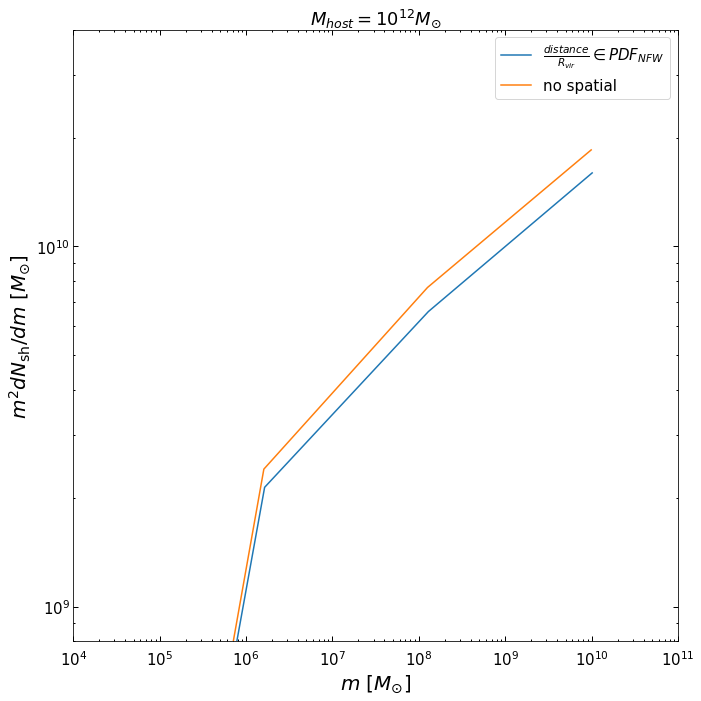

In [5]:
def plot_m2dndm(m0,weight):
    N,lnm_edges = np.histogram(np.log(m0/Msolar),weights=weight)#,bins=100)
    lnm = (lnm_edges[1:]+lnm_edges[:-1])/2.
    dlnm = lnm_edges[1:]-lnm_edges[:-1]

    m = np.exp(lnm)
    dNdlnm = N/dlnm

    dNdm   = dNdlnm/m
    

    plt.loglog(m,m**2*dNdm)
    
plt.figure(figsize=(10,10))
plot_m2dndm(m0_new,weight_new)
plot_m2dndm(m0_av,weight_av)

plt.legend([r'$\frac{distance}{R_{vir}} \in PDF_{NFW}$','no spatial'])
plt.title('$M_{host}=10^{ %i } M_{\odot}$' %np.log10(M0),loc='center')
plt.xlabel(r'$m$ [$M_{\odot}$]',fontsize=20)
plt.ylabel(r'$m^{2} dN_{\rm sh}/dm$ [$M_{\odot}$]',fontsize=20)

plt.xlim(1e4,1e11)
plt.ylim(8e8,4e10)

plt.tight_layout()


# Spatial result of the updated model and simulation

Here I define the functions that are the result of Shunichi 's work on radial linear probabability distribution,with the function Simulation_2(x) being more accurate.The functions Simulation_1(x),Simulation_2(x) can be found at slide 23 and 24 at Shunichi's slides. The Simulation_1(x) is noted as (4.1) and Simulation_2(x) as (4.2) by the respected equations in my notion page.

In [6]:
#Radial distribution from simulation's results:

def radius_selection(r_min,r_max,m0):
    r_range_low=m0>(r_min)
    r_range_high=m0<(r_max)
    return r_range_low*r_range_high

#First results by fitting:
def Simulation_1(x):
    c=0.821
    S=1.519
    #S*(c*x**2)/(c*x**2+(1-c)*(1-x)**2)
    return (c*x**2)/(c*x**2+(1-c)*(1-x)**2)

#Second results (and better one) by fitting:
def Simulation_2(x):
    a=2.2
    c=0.606
    S=9.839
    return S*x**2/(1+(x/c)**2)**(3/a)/1.6385261053418323
    #return S*x**2/(1+(x/c)**2)**(3/a)

#Function for selecting subhalos' mass within a specific mass range,the variable m0 is an array:

def mass_selection(m_min,m_max,m0):
    mass_range_low=m0>(m_min*Msolar)
    mass_range_high=m0<(m_max*Msolar)
    return mass_range_low*mass_range_high


In [7]:
pdf_1=np.zeros(1000)
pdf_2=np.zeros(1000)
pos=np.zeros(1000)
x=np.logspace(-5,0,1001)
for i in range(0,len(x)-1):
    pdf_1[i]=(Simulation_1(x[i+1])-Simulation_1(x[i]))/3/(x[i+1]-x[i])
    pdf_2[i]=(Simulation_2(x[i+1])-Simulation_2(x[i]))/3/(x[i+1]-x[i])
    pos[i]=(x[i]+x[i+1])/2

f_1 = interpolate.interp1d(pos,pdf_1)
f_2 = interpolate.interp1d(pos,pdf_2)


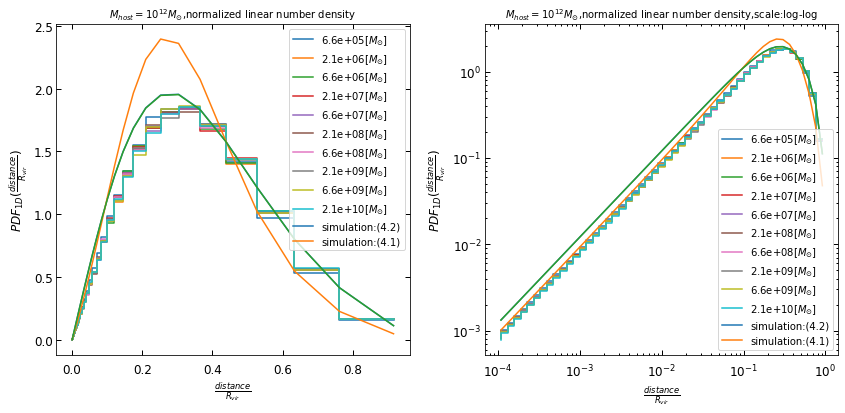

In [8]:
names=[]
if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+1)
else:
    bins=np.linspace(rmin,1,N_r+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density,scale:log-log', fontsize=10)
kk=zacc_new>0.
for i in range(0,10):
    w=mass_selection(10**(i/2+5.5),10**(i/2+6),m0_new)
    NN,rr=np.histogram(r_new[w*kk],weights=weight_new[w*kk],bins=bins,density=True)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    ax1.step(radius,NN)
    ax2.step(radius,NN)
    names.append(str('{:0.1e}'.format((10**(i/2+5.5)+10**(i/2+6))/2))+str(r'$[M_{\odot}]$'))
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{1D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,f_2(radius)/(f_2(radius)*dr).sum())
    ax.plot(radius,f_1(radius)/(f_1(radius)*dr).sum())
    ax.plot(radius,radial_weights(radius))
    
names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
plt.tight_layout()

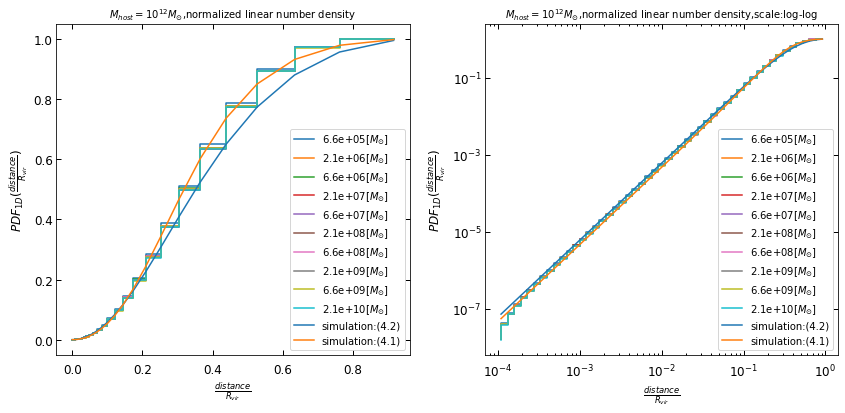

In [9]:
names=[]
if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+1)
else:
    bins=np.linspace(rmin,1,N_r+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density,scale:log-log', fontsize=10)
for i in range(0,10):
    w=mass_selection(10**(i/2+5.5),10**(i/2+6),m0_new)
    NN,rr=np.histogram(r_new[w*kk],weights=weight_new[w*kk],bins=bins)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    CDF=np.cumsum(NN)
    ax1.step(radius,CDF/CDF[-1])
    ax2.step(radius,CDF/CDF[-1])
    names.append(str('{:0.1e}'.format((10**(i/2+5.5)+10**(i/2+6))/2))+str(r'$[M_{\odot}]$'))
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{1D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,Simulation_2(radius))
    ax.plot(radius,Simulation_1(radius))

names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
plt.tight_layout()

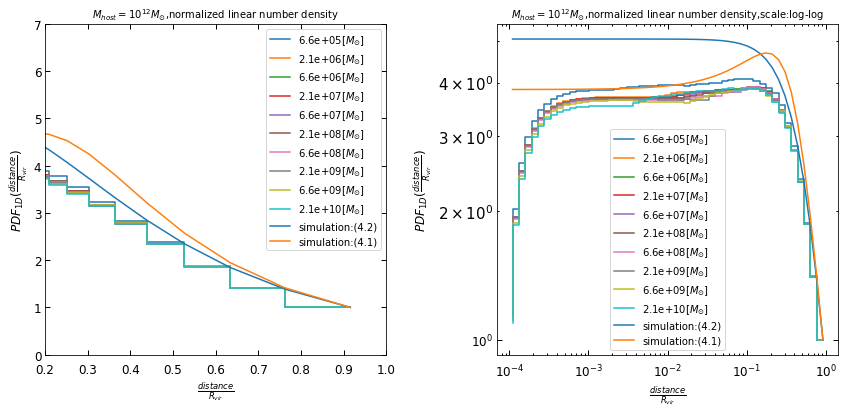

In [14]:
names=[]
if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+1)
else:
    bins=np.linspace(rmin,1,N_r+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density,scale:log-log', fontsize=10)
kk=zacc_new>0.
for i in range(0,10):
    w=mass_selection(10**(i/2+5.5),10**(i/2+6),m0_new)
    NN,rr=np.histogram(r_new[w*kk],weights=weight_new[w*kk],bins=bins)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    CDF=np.cumsum(NN)
    CDF=CDF/CDF[-1]
    dNdV=CDF/(4*np.pi*radius**2)
    ax1.step(radius,dNdV/dNdV[-1])
    ax2.step(radius,dNdV/dNdV[-1])
    names.append(str('{:0.1e}'.format((10**(i/2+5.5)+10**(i/2+6))/2))+str(r'$[M_{\odot}]$'))
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{1D}(\frac{distance}{R_{vir}})$', fontsize=12)
    dNdV_S2=Simulation_2(radius)/(4*np.pi*radius**2)
    dNdV_S1=Simulation_1(radius)/(4*np.pi*radius**2)
    ax.plot(radius,dNdV_S2/dNdV_S2[-1])
    ax.plot(radius,dNdV_S1/dNdV_S1[-1])

names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.set_xlim(0.2,1)
ax1.set_ylim(0,7)
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
plt.tight_layout()

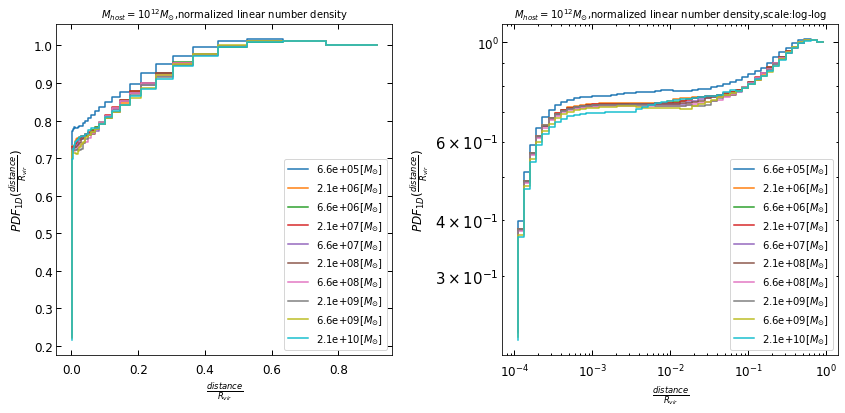

In [11]:
names=[]
if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+1)
else:
    bins=np.linspace(rmin,1,N_r+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density,scale:log-log', fontsize=10)
for i in range(0,10):
    w=mass_selection(10**(i/2+5.5),10**(i/2+6),m0_new)
    NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    CDF=np.cumsum(NN)
    CDF=CDF/CDF[-1]
    dNdV=CDF/(4*np.pi*radius**2)
    dNdV_S2=Simulation_2(radius)/(4*np.pi*radius**2)
    ax1.step(radius,(dNdV/dNdV[-1])/(dNdV_S2/dNdV_S2[-1]))
    ax2.step(radius,(dNdV/dNdV[-1])/(dNdV_S2/dNdV_S2[-1]))
    names.append(str('{:0.1e}'.format((10**(i/2+5.5)+10**(i/2+6))/2))+str(r'$[M_{\odot}]$'))
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{1D}(\frac{distance}{R_{vir}})$', fontsize=12)

ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
plt.tight_layout()